<h1>Лабораторна робота №6</h1>
<h2>З обробки та аналізу БМД</h2>
<h2>Виконав:<br>Яцина Денис<br></h2>
<br><h3>Парний t-критерій Стьюдента</h3>

1.Обрати реальні дані з kaggle або сгенерувати випадкові дані. Дані мають відповідати вимогам викладеним вище. Формат даних:

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint
import seaborn as sns
import scipy.stats as ss
import math

In [8]:
df_1 = randint(60, 90, 6)
df_2 = randint(75, 130, 6)
data = pd.DataFrame({"До вправ": df_1, "Після вправ": df_2,}, index = np.arange(1,len(df_1)+1))
data.index.name = '№ учасника'
data.columns.name = 'Пульс'
data

Пульс,До вправ,Після вправ
№ учасника,,
1,74,80
2,88,77
3,70,91
4,86,92
5,89,123
6,87,121


2.Побудувати графік, що відображає розкид даних в групах. Приклад:

[]

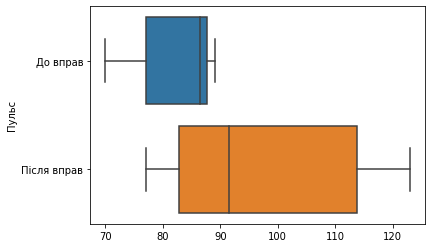

In [11]:
sns.boxplot(data=data, orient = 'h').set()

3.Написати функції:

для оцінки зв'язку між групами за коефіцієнтом кореляції Пірсона. Функція має повертати значення коефіцієнту кореляції, значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).

для визначення відмінності між групами за критерієм Стьюдента. Функція має повертати значення критерію Стьюдента,значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).

In [101]:
def Pirson(x, y):
    n = len(x)
    r = ( sum(x * y) - n * (sum(x)/n) * (sum(y)/n) ) / ( n * ( ( ( sum(x**2)/n - (sum(x)/n)**2 ) * ( sum(y**2)/n - (sum(y)/n)**2) ) )**(1/2) )
    print("Значення коефіцієнту кореляції: " + str(r))
    df = n - 2
    print("Значення ступеня свободи: " + str(df))
    table = pd.read_excel(r'C:\Users\User\Таблиця критичних значень кореляційного аналізу.xlsx', encoding='utf-8')
    a=table.iloc[df-1, 1 ]
    print("Критичне значення коефіцієнту кореляції = " + str(a))
    result = ("significant") if abs(r) > a else "not significant"
    print("Результат оцінки значимості зв'зку: " + result)
    return r, df, result

In [98]:
def Student(x, y):
    difference = x - y
    n = len(x)
    m = difference.mean()
    diff = difference.std()
    t = (m/diff) * (n)**(1/2)
    print("Значення t-критерію Стьюдента: t = "  + str(t))
    df = n - 1
    print('Значення ступеня свободи: df = ' + str(df))
    table = pd.read_excel(r'C:\Users\User\Таблица критических значений для парного критерия.xlsx', encoding='utf-8')
    b=table.iloc[df-1, 1 ]
    print("Критичне значення коефіцієнту Стьюдента = " + str(b))
    result = ("significant") if abs(t) > b else "not significant"
    print("Результат оцінки значимості зв'зку: " + result)
    return t, df, result

4.Перевірити розбіжність на між групами на даних з п. 1.

In [102]:
Pirson(df_1, df_2)

Значення коефіцієнту кореляції: 0.4521884014800096
Значення ступеня свободи: 4
Критичне значення коефіцієнту кореляції = 0.8114
Результат оцінки значимості зв'зку: not significant


(0.4521884014800096, 4, 'not significant')

In [103]:
Student(df_1, df_2)

Значення t-критерію Стьюдента: t = -2.252817784447915
Значення ступеня свободи: df = 5
Критичне значення коефіцієнту Стьюдента = 2.571
Результат оцінки значимості зв'зку: not significant


(-2.252817784447915, 5, 'not significant')

5.Сформувати висновок про взаємозв'язок між групами та про їх розбіжність.

Висновок:

1)Під час аналізу залежності між групами за допомогою критерія Пірсона я отримав результат, який стверджує, що статистичної залежності немає.

2)Під час аналізу відмінності між групами за допомогою критерія t-Стьюдента, було прийнято нульову гіпотезу про рівність середніх.